# Read a data from csv


In [6]:
import csv
import pandas as pd
import numpy as np
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
import matplotlib.pyplot as plt
from nltk.stem import PorterStemmer
import re
import warnings

warnings.filterwarnings("ignore")

df = pd.read_csv("/Users/rabnawazjansher/Documents/textMiningProjects/fn/data/newdata.csv")
data = df
data = data.dropna() 
data.shape

(79996, 12)

# Data Preprocessing and cleaning

In [7]:
stop_words = set(stopwords.words('english'))
def proPorcessing(text):
    text = re.sub("[^A-Za-z]", " ",  str(text))
    ## remove space
    text = ' '.join(text.split())
    ##lower text
    return text


pre_processed_data = []

for i in data['Review_Text']:
    pre_processed_data.append(proPorcessing(i))
    
data['clean_data'] = pre_processed_data


label = []
class_ = []


for f in data['Rating']:
    rating = f
    if rating < 3:
        label.append("Negative")
        class_.append(0)
    else:
        class_.append(1)
        label.append("Positive")
        
        
data['label'] = label
data['class_'] = class_

# Actual class label Frequency

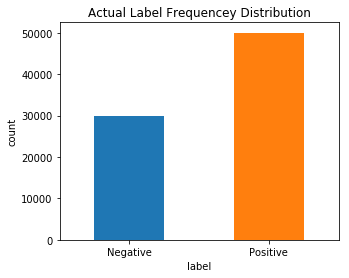

In [8]:
import matplotlib.pyplot as plt


fig = plt.figure(figsize= (5,4))

data.groupby('label').Review_Text.count().plot.bar(ylim=0)
plt.title('Actual Label Frequencey Distribution')
plt.ylabel('count')


plt.xticks(rotation='horizontal')
plt.savefig('actual_label.png')

In [ ]:
clean_data = data
clean_data.to_csv('/Users/rabnawazjansher/Documents/textMiningProjects/fn/data/newdata.csv', index = False)